In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error,mean_squared_error

In [2]:
data = pd.read_csv('processed_data.csv')

## Scaler and normalize the data

In [3]:
label = data['market_value_in_million']
feature = data.drop(['market_value_in_million'],axis = 1)
scaler = StandardScaler()
f_scaled = scaler.fit_transform(feature)
f_normalized = normalize(f_scaled)

In [4]:
f_train,f_test,l_train, l_test = train_test_split(f_normalized,label, test_size = 0.2, random_state = 0)

In [5]:
lasso_model = linear_model.Lasso(alpha=0.1)
lasso_model.fit(f_train,l_train)
lasso_model.score(f_train,l_train)

0.3937620293180488

In [6]:
print(lasso_model.coef_)

[ 0.          0.         -0.         -0.          0.          0.
  0.          0.          0.         -0.          0.         -0.
  0.         -0.         -0.         -0.          0.         -0.
  0.         -0.         -0.         -0.          0.         -0.
 -0.          0.          0.          0.         -0.          0.
  0.          0.         -0.         -0.         -0.         -0.
  0.         -0.          0.          0.          0.         -0.
  0.          0.          0.         -0.         -0.         -0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         26.03971736  0.
 -0.          8.74197478  6.30858129  4.29554868  0.          0.        ]


## tuning model and choose best alpha

In [7]:
from sklearn.linear_model import LassoLarsIC
from sklearn.pipeline import make_pipeline


lasso_lars_aic =  LassoLarsIC(criterion="aic", normalize=False).fit(f_train, l_train)
lasso_lars_bic = LassoLarsIC(criterion="bic", normalize=False).fit(f_train, l_train)

results = pd.DataFrame(
    {
        "alphas": lasso_lars_aic.alphas_,
        "AIC criterion": lasso_lars_aic.criterion_,
        "BIC criterion": lasso_lars_bic.criterion_,
    }
).set_index("alphas")
alpha_aic = lasso_lars_aic.alpha_
alpha_bic = lasso_lars_bic.alpha_

In [8]:
def highlight_min(x):
    x_min = x.min()
    return ["font-weight: bold" if v == x_min else "" for v in x]


results.style.apply(highlight_min)

,AIC criterion,BIC criterion
alphas,,
0.5401257956763738,51180.000000,51180.000000
0.30746799972366423,40573.489635,40582.332739
0.3005556694624692,40230.813297,40248.499505
0.30022830121876226,40211.513347,40238.042659
0.039495305937444554,30068.590505,30103.962921
0.035754714484001124,30025.359390,30069.574910
0.025860424146988865,29893.338294,29946.396918
0.02464486666292875,29878.708548,29940.610277
0.02418480220525459,29873.177092,29943.921925


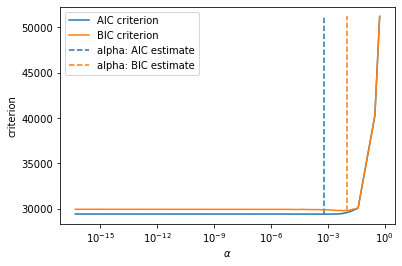

In [9]:
ax = results.plot()
ax.vlines(
    alpha_aic,
    results["AIC criterion"].min(),
    results["AIC criterion"].max(),
    label="alpha: AIC estimate",
    linestyles="--",
    color="tab:blue",
)
ax.vlines(
    alpha_bic,
    results["BIC criterion"].min(),
    results["BIC criterion"].max(),
    label="alpha: BIC estimate",
    linestyle="--",
    color="tab:orange",
)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("criterion")
ax.set_xscale("log")
ax.legend()

In [10]:
lasso_model = linear_model.Lasso(alpha=0.0006164712757976496)
lasso_model.fit(f_train,l_train)
lasso_model.score(f_train,l_train)

0.4274819313787447

In [11]:
print(lasso_model.coef_)

[ 0.62205199 -0.         -0.          0.          1.63357722  0.
 -0.15718054  0.04963083  2.53586694 -1.30586066  0.69783905 -1.30730031
  0.26901373 -0.44007937  0.         -1.20751397 -0.         -0.52706411
  1.2932739  -0.1029585   0.07104097 -1.0266301  -0.         -0.08785757
 -0.          1.4519949  -0.         -0.65068829  0.6753404   0.
 -0.60854067  0.         -0.16510299  0.04876079  1.01410262 -0.91387363
  0.6749948   0.48668524  1.4658496   0.66261478  1.15089169 -1.35159642
  0.49027406  1.29939276  0.89979259 -0.19304537 -0.05086564 -0.05719228
  1.22215627 -0.52570494  0.30519274 -0.98690043 -0.87781398 -0.80507588
 -1.11992952 -0.26914043  0.         -0.97358327 30.43892842  2.29245422
 -1.93409241 14.12159626 10.20414433  7.10510734 -2.23847073  0.03712157]


In [22]:
choose = lasso_model.coef_ != 0
feature_name = list(feature.columns)
feature_choose = np.array(feature_name)[choose]
print('feature most related to market value are:   ')
print(feature_choose)

feature most related to market value are:   
['height_in_cm' 'position_Midfield' 'sub_position_Attacking Midfield'
 'sub_position_Central Midfield' 'sub_position_Centre-Back'
 'sub_position_Centre-Forward' 'sub_position_Defensive Midfield'
 'sub_position_Left Midfield' 'sub_position_Left Winger'
 'sub_position_Left-Back' 'sub_position_Right Midfield'
 'sub_position_Right-Back' 'sub_position_Second Striker' 'foot_Both'
 'foot_Left' 'foot_N/A' 'domestic_league_code_BE1'
 'domestic_league_code_ES1' 'domestic_league_code_GB1'
 'domestic_league_code_GR1' 'domestic_league_code_L1'
 'domestic_league_code_NL1' 'domestic_league_code_PO1'
 'domestic_league_code_RU1' 'domestic_league_code_SC1'
 'domestic_league_code_TR1' 'domestic_league_code_UKR1'
 'country_of_birth_Argentina' 'country_of_birth_Belgium'
 'country_of_birth_Brazil' 'country_of_birth_Denmark'
 'country_of_birth_England' 'country_of_birth_France'
 'country_of_birth_Germany' 'country_of_birth_Greece'
 'country_of_birth_Italy' 'countr

In [20]:
top = lasso_model.coef_.argmax()
top_feature = np.array(feature_name)[top]
print('most important feature is:   ',top_feature)

most important feature is:    club_total_market_value_in_million


In [12]:
l_pred = lasso_model.predict(f_test)

In [14]:
mae = mean_absolute_error(l_pred, l_test)
mse = mean_squared_error(l_pred, l_test)
rmse = mean_squared_error(l_pred, l_test, squared=False)
score = lasso_model.score(f_test, l_test)
print('test result')
print('mean absolute error: %12.4f' % mae)
print('mean squared error: %14.4f' % mse)
print('root mean squared error: %8.4f' % rmse)
print('r^2: %28.4f' % score)

test result
mean absolute error:       3.0484
mean squared error:        36.4017
root mean squared error:   6.0334
r^2:                       0.4343
